In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

loading successful!


Integral over Q is: 71.22004854937705
Integral over E is: 5.48199435187967
Integral over e is: 8.381406541838265


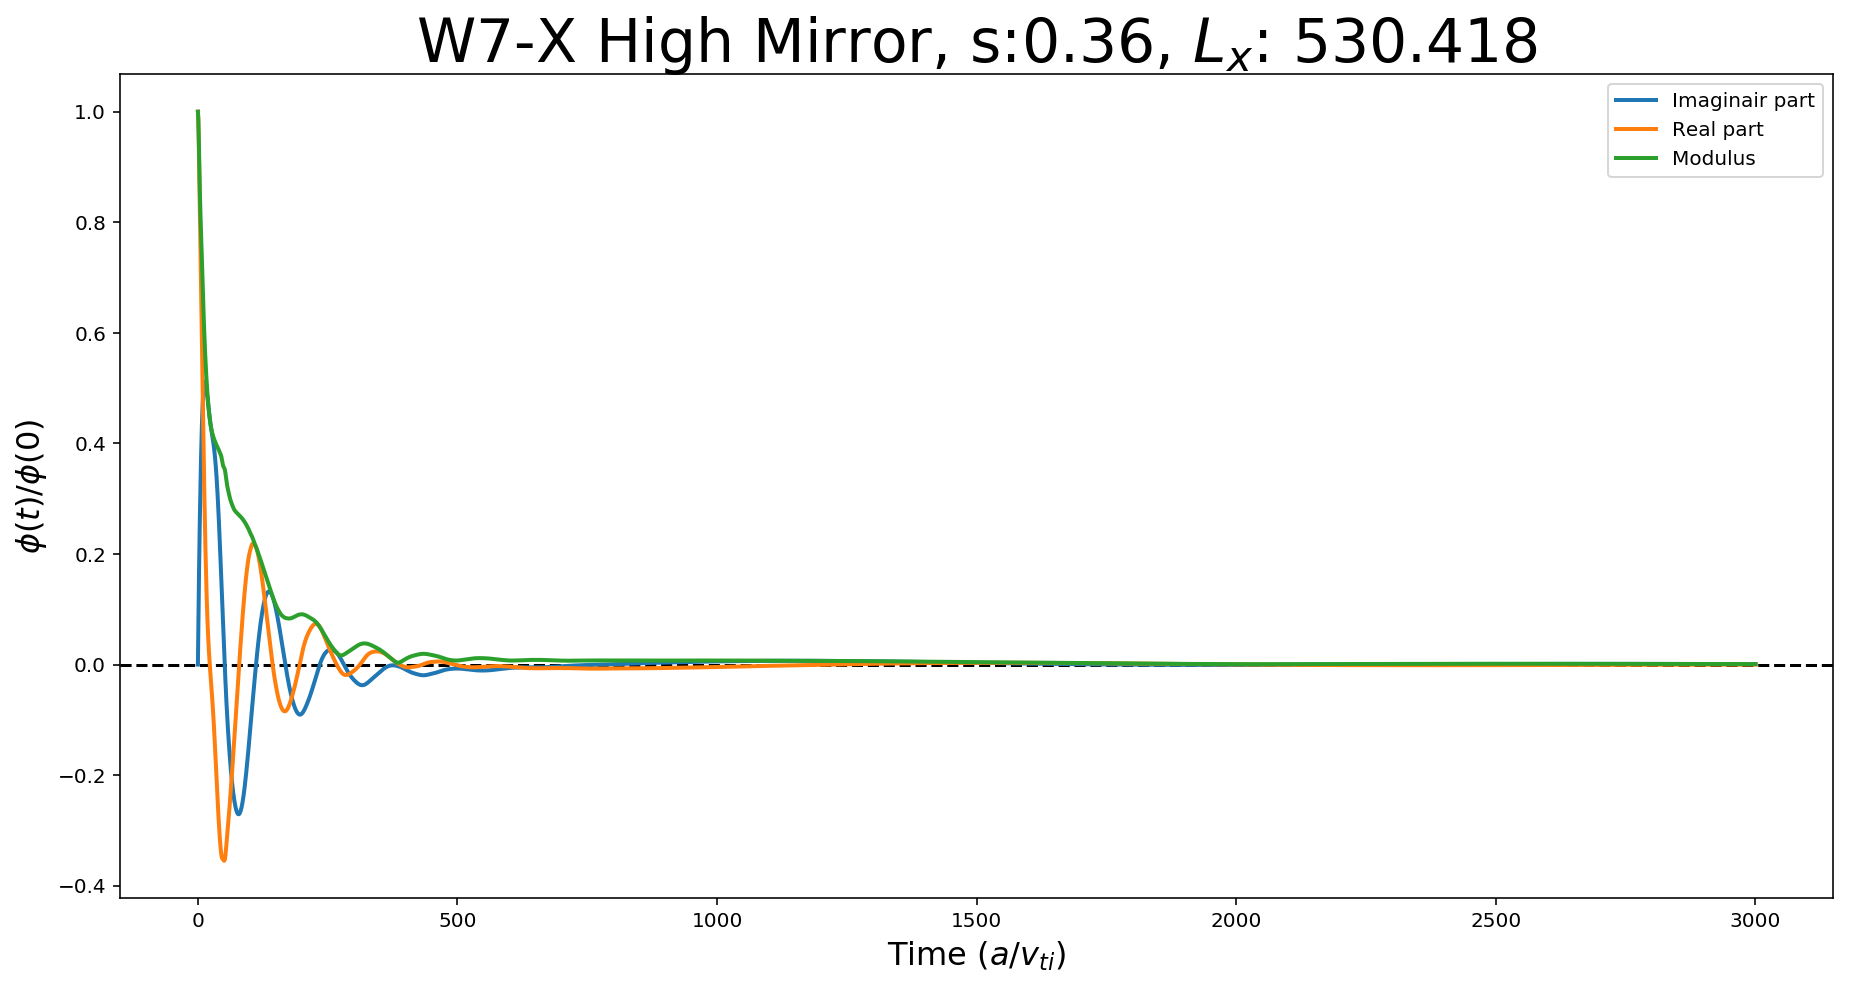

In [2]:
data = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms036/GAM/530.418/gamdiagions_act.dat')
E = (data[:,1]*(1/data[0, 1]))
e = (data[:,2]*(1/data[0, 1]))
t = data[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.36, $L_{x}$: 530.418', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')

Q = np.sqrt(E**2+e**2)
ax1.plot(t, e, linewidth=2, label=('Imaginair part'))
ax1.plot(t, E, linewidth=2, label=('Real part'))
ax1.plot(t, Q, linewidth=2, label=('Modulus'))
plt.legend()

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ1 = (np.trapz(Q,t))
integ2 = (np.trapz(E,t))
integ3 = (np.trapz(e,t))

print("Integral over Q is:", integ1)
print("Integral over E is:", integ2)
print("Integral over e is:", integ3)

In [3]:
#to make sure it takes into account all values until the end of the data and to determine the standard deviation in the residual
n=0
teller=0
residual=0
nfix=0
finalvaluedata=3927
while n < finalvaluedata:
    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual=(residual*(n-nfix)+Q[n])/(n+1-nfix)#to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else:
        teller=0
        residual=0
        nfix = (n+1)
    n=n+1
print("Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:")
print("The values of n, Q[n] and t at the start of the averaging are: n =", n-teller, ", Q =", Q[n-teller], ", t =", t[n-teller])
print("The amount of data points over which the average is taken =", teller)
listofqvalues=Q[(n-teller):n]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std=np.std(listofqvalues)
#meanres=np.mean(listofqvalues)
print("The residual value is:",residual, "+-", std)

Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:
The values of n, Q[n] and t at the start of the averaging are: n = 1041 , Q = 0.007139721762704077 , t = 795.32
The amount of data points over which the average is taken = 2886
The residual value is: 0.0031173664821257737 +- 0.002467083179162134


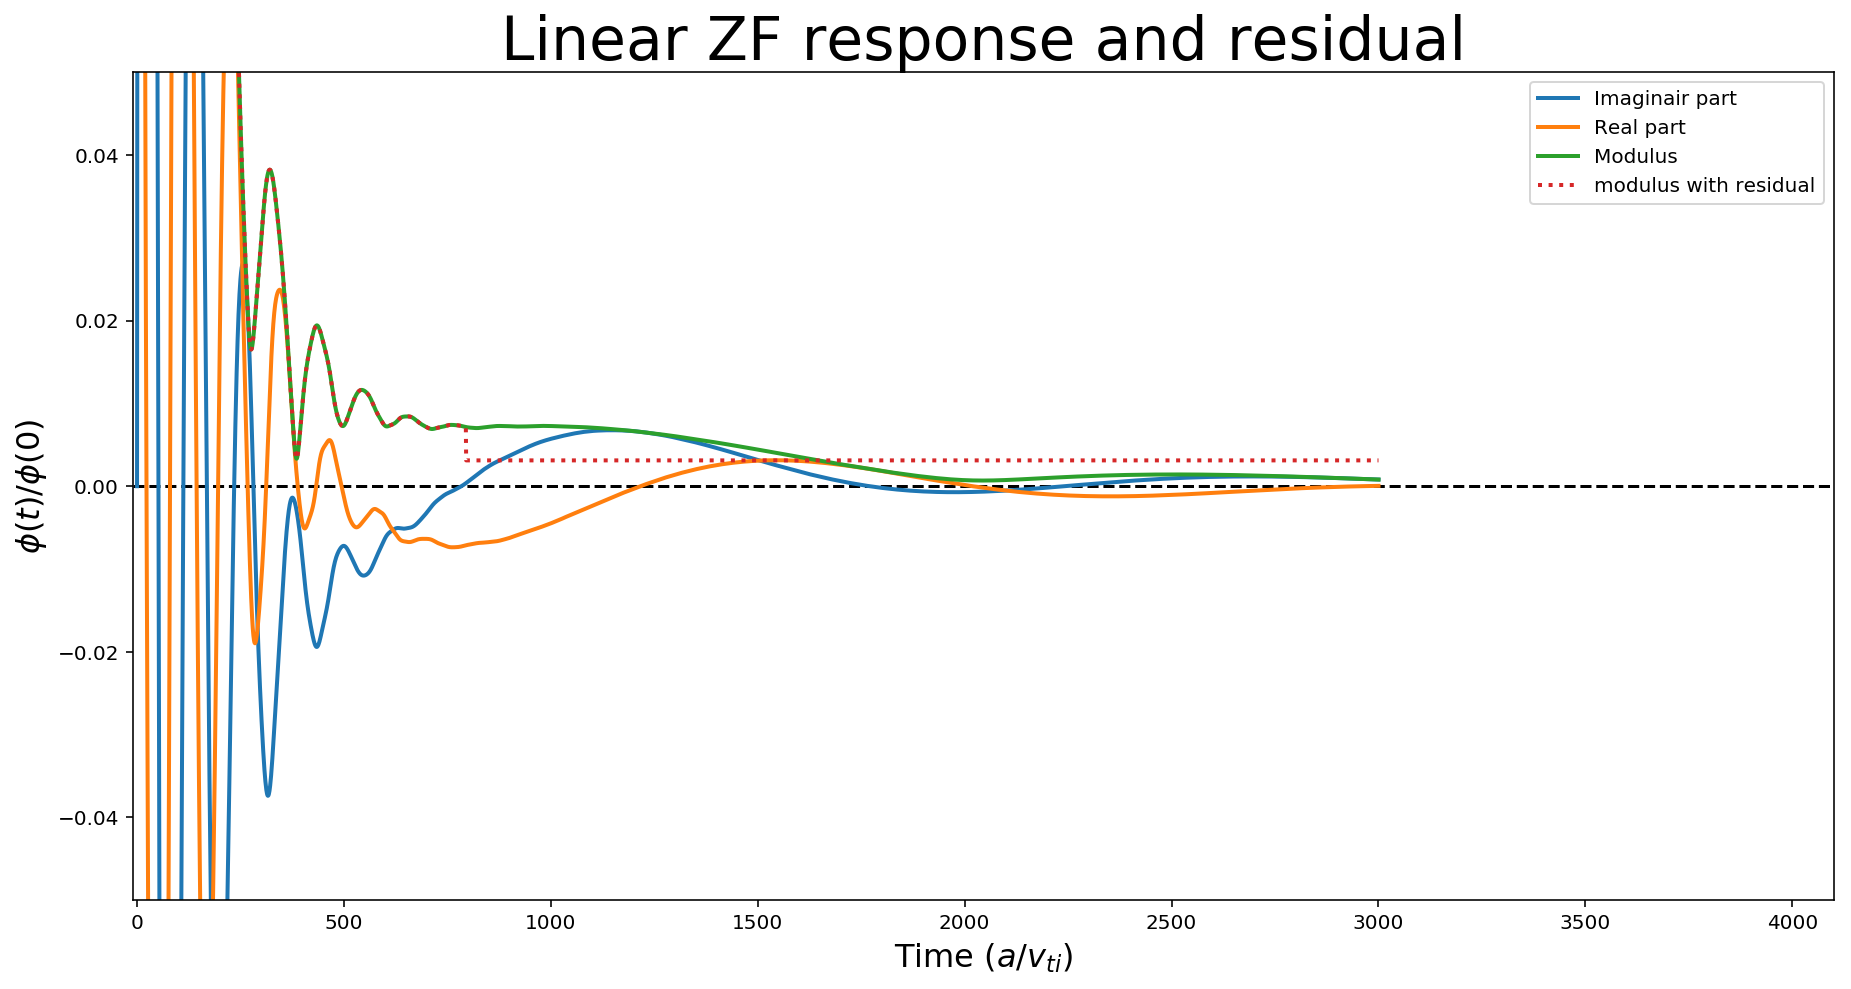

In [4]:
residuallist = [] ##
a = 0 ##
while a < finalvaluedata+1:##
    if a < n-teller:
        residuallist.append(Q[a])
    else:
        residuallist.append(residual)
    a = a+1##
#print(residuallist)

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('Linear ZF response and residual', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])
plt.ylim([-0.05,0.05])

ax1.plot(t, e, linewidth=2, label=('Imaginair part'))
ax1.plot(t, E, linewidth=2, label=('Real part'))
ax1.plot(t, Q, linewidth=2, label=('Modulus'))
ax1.plot(t,residuallist,linewidth=2,label=('modulus with residual'),linestyle='dotted')
plt.legend()
fig.tight_layout()